# Install Library

In [56]:
# !pip install numpy pandas matplotlib seaborn wordcloud nltk emoji scikit-learn xgboost lime

# Import Library

In [2]:
import re
import nltk
import emoji
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')


Read the Train & Test Dataset

In [3]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
submission_data = pd.read_csv("sample_submission.csv")

Train Dataset

In [4]:
data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam


Test Dataset

In [5]:
data_test.head()

,id_,source,email
0,b4c16282-2934-49c9-ae12-99ad8ca3c960,5,Subject: get me thru july newsletter\nthe get ...
1,cbe49c1c-b328-4716-9b78-9169c6111e80,4,Subject: looking for a good match to take out ...
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac,4,"Subject: fw : besides our special pricing , yo..."
3,b696569e-f7de-4771-9946-be5dd477b2f6,5,Subject: access to mary solmonson ' s e - mail...
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85,2,Subject: software should be easy to use !\nsev...


Check Data Shape

In [6]:
data_train.shape

(15000, 4)

In [7]:
data_train.describe()

,source
count,15000.000000
mean,4.007333
std,1.426259
min,2.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,6.000000


Chack the data information

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_     15000 non-null  object
 1   source  15000 non-null  int64 
 2   email   15000 non-null  object
 3   class   15000 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.9+ KB


Check Null Values

In [9]:
data_train.isnull().sum()

id_       0
source    0
email     0
class     0
dtype: int64

In [10]:
data_train.source.value_counts()

source
6    3179
4    3124
2    3033
3    2923
5    2741
Name: count, dtype: int64

Number of spam and not_spam class

In [11]:
data_train['class'].value_counts()

class
spam        8254
not_spam    6746
Name: count, dtype: int64

Find Duplicate Rows

In [12]:
duplicate_rows = int(data_train.duplicated().sum())
print(f"Duplicates rows: {duplicate_rows}")

Duplicates rows: 0


# Exploratory Data Analysis (EDA)

Calculate the count of each class with Visualization

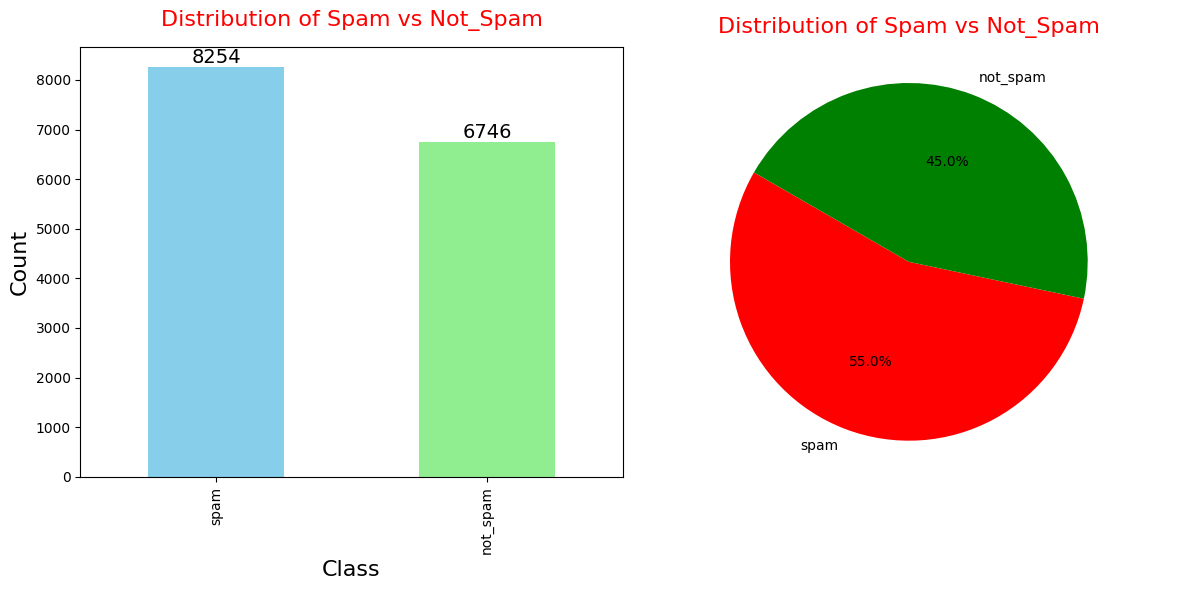

In [13]:
class_counts = data_train['class'].value_counts()

plt.figure(figsize=(12, 6))

# Bar chart
plt.subplot(1, 2, 1)
bars = class_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=14)

plt.title('Distribution of Spam vs Not_Spam', pad=15, fontsize=16, color='red')
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=150, colors=['red', 'green'])
plt.title('Distribution of Spam vs Not_Spam', pad=10, fontsize=16, color='red')
plt.axis('equal')

plt.tight_layout()
plt.show()


Most Frequency Word for each class

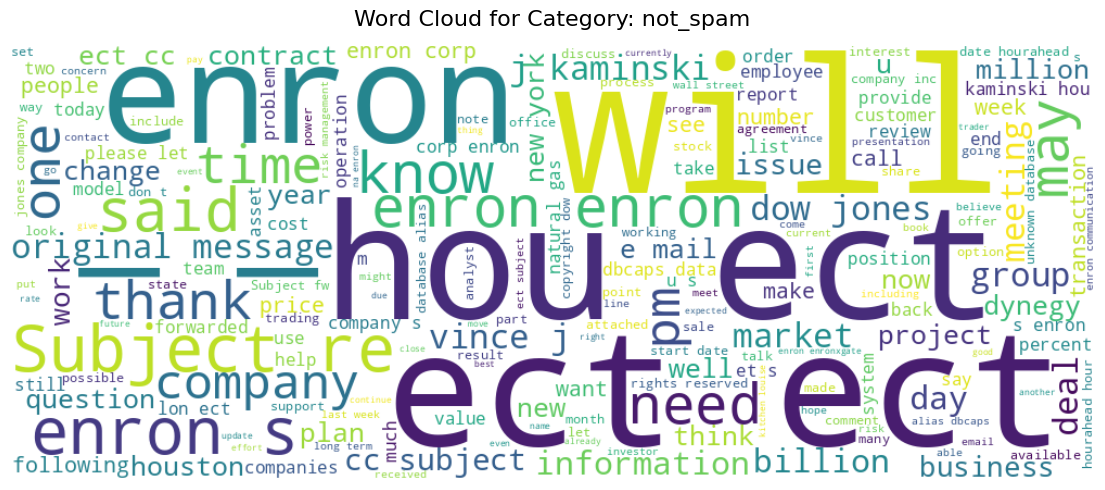

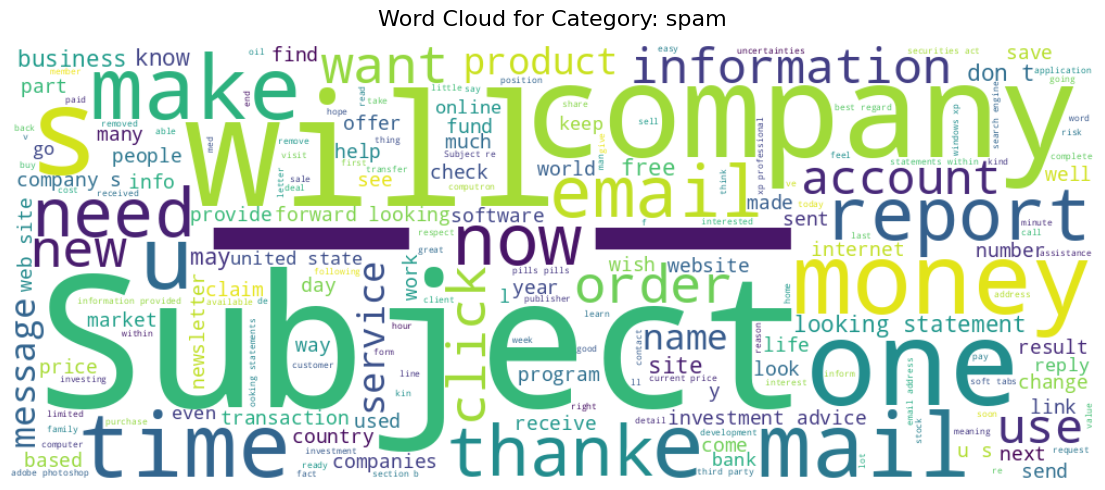

In [14]:
for label in data_train['class'].unique():
    filtered_df = data_train[data_train['class'] == label]
    text = ' '.join(filtered_df['email'])
    wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(14, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {label}', pad=15, fontsize=16)
    plt.axis('off')
    plt.show()

# Preprocess the Email Text 

In [15]:
data_train.columns

Index(['id_', 'source', 'email', 'class'], dtype='object')

Convert 'email' column to lowercase

In [16]:
data_train['email'] = data_train['email'].str.lower()
data_test['email'] = data_test['email'].str.lower()

data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject: cheap vicodin online - us fda pharmac...,spam


Remove URLs from email column

In [17]:
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

data_train['email'] = data_train['email'].apply(remove_urls)
data_test['email'] = data_test['email'].apply(remove_urls)


Remove all which is not a letter, digit, or space

In [18]:
def remove_special_characters(text):
    return re.sub(r'[^\w\s]', ' ', text)

data_train['email'] = data_train['email'].apply(remove_special_characters)
data_test['email'] = data_test['email'].apply(remove_special_characters)


In [19]:
data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject is the supply rebound beginning an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject email list 100 million addresses ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject cheap vicodin online us fda pharmac...,spam


<ul>
<li>Replace newline characters with a space </li>
<li>Replace multiple spaces with a single space</li>
</ui>

In [20]:
def clean_text(text):
    text = text.replace('\n', ' ')
    text = ' '.join(text.split())
    return text
data_train['email'] = data_train['email'].apply(clean_text)
data_test['email'] = data_test['email'].apply(clean_text)

data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject is the supply rebound beginning an upd...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject email list 100 million addresses 79 ja...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject alley dodecahedra suicide are you read...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject ibuyit project i wanted to share some ...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject cheap vicodin online us fda pharmacy h...,spam



Remove Special character which is not alphanumeric or whitespace

In [21]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    clean_text = re.sub(pattern, ' ', text)
    
    return clean_text

data_train['email'] = data_train['email'].apply(remove_special_characters)
data_test['email'] = data_test['email'].apply(remove_special_characters)

data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject is the supply rebound beginning an upd...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject email list 100 million addresses 79 ja...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject alley dodecahedra suicide are you read...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject ibuyit project i wanted to share some ...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject cheap vicodin online us fda pharmacy h...,spam


Remove numeric values from text

In [22]:
def remove_numeric(text):
    return re.sub(r'\d+', ' ', text)

data_train['email'] = data_train['email'].apply(remove_numeric)
data_test['email'] = data_test['email'].apply(remove_numeric)

data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject is the supply rebound beginning an upd...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject email list million addresses jane ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject alley dodecahedra suicide are you read...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject ibuyit project i wanted to share some ...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject cheap vicodin online us fda pharmacy h...,spam


Remove non-alphanumeric characters

In [23]:
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)


data_train['email'] = data_train['email'].apply(remove_non_alphanumeric)
data_test['email'] = data_test['email'].apply(remove_non_alphanumeric)

Remove Stopwords <br>
In text data stopwords(am, is, are, was etc..) doesn't any effect on the text classification.

In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


data_train['email'] = data_train['email'].apply(remove_stopwords)
data_test['email'] = data_test['email'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /home/bikas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject supply rebound beginning update cera o...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject email list million addresses jane info...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject alley dodecahedra suicide ready lomse ...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject ibuyit project wanted share great news...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject cheap vicodin online us fda pharmacy h...,spam


Remove emoji

In [26]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace=' ')

data_train['email'] = data_train['email'].apply(remove_emojis)
data_test['email'] = data_test['email'].apply(remove_emojis)

# Stemming
Stemming is a process in natural language processing (NLP) that involves reducing words to their core/base or root form, known as the stem. The purpose of stemming is to standardize words with similar meanings, treating different variations of the same word as equivalent. This simplification aids in enhancing text analysis and information retrieval by minimizing vocabulary complexity.

In [27]:
porter_stemmer = PorterStemmer()

data_train['email'] = data_train['email'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
data_test['email'] = data_test['email'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))


In [28]:
data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject suppli rebound begin updat cera outloo...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject email list million address jane inform...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject alley dodecahedra suicid readi loms we...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject ibuyit project want share great news m...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject cheap vicodin onlin us fda pharmaci hy...,spam


Mapping the target class where i defined class label <b>spam is 1 and not_spam is 0</b>

In [29]:
class_mapping = {'spam': 1, 'not_spam': 0}
data_train['class'] = data_train['class'].map(class_mapping)

In [30]:
data_train.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,subject suppli rebound begin updat cera outloo...,0
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,subject email list million address jane inform...,1
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,subject alley dodecahedra suicid readi loms we...,1
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,subject ibuyit project want share great news m...,0
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,subject cheap vicodin onlin us fda pharmaci hy...,1


Split the dataset into train and test where i take 80% data for training and 20% data for testing.

In [31]:
X = data_train['email']
y = data_train["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Text Vectorization

#  CountVectorizer
CountVectorizer is a text preprocessing vectorization method used in natural language processing (NLP) tasks for converting a collection of text documents into a numerical representation which is a matrix.

In [32]:
# count_vectorizer = CountVectorizer()

# X_train = count_vectorizer.fit_transform(X_train).toarray()
# X_test = count_vectorizer.transform(X_test).toarray()

#  TF-IDF Vectorizer

TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

In [33]:
tfidf_vc = TfidfVectorizer()
X_train = tfidf_vc.fit_transform(X_train).toarray()
X_test = tfidf_vc.transform(X_test).toarray()

In [34]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Multinomial Naive Bayes (MNB) Model

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

Predict on test data

In [36]:
y_pred = classifier.predict(X_test)

Accuracy of the Model

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy*100:.2f}%')


Accuracy: 98.67%


Classification metrics

In [38]:
classification_report = classification_report(y_test, y_pred)
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


Classification Report

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1403
           1       0.98      0.99      0.99      1597

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



# Confusion matrix

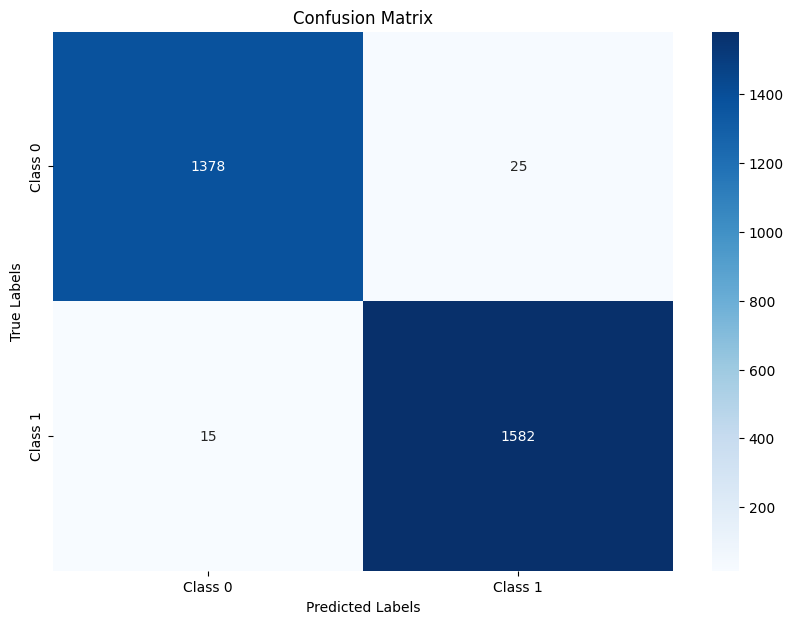

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Test Data(test.csv) for submission file

In [40]:
data_test.shape

(13544, 3)

Vectorize the Test data

In [41]:
# test_data_vectorizer = count_vectorizer.transform(data_test['email']).toarray()
test_data_vectorizer = tfidf_vc.transform(data_test['email']).toarray()
tfidf_vc

TfidfVectorizer()

Predict the Test csv data

In [42]:
y_pred = classifier.predict(test_data_vectorizer)

In [43]:
submission_data['class'].value_counts()

class
not_spam    13544
Name: count, dtype: int64

In [44]:
submission_data.drop("class", axis=1, inplace=True)
submission_data.head()

,id_
0,b4c16282-2934-49c9-ae12-99ad8ca3c960
1,cbe49c1c-b328-4716-9b78-9169c6111e80
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac
3,b696569e-f7de-4771-9946-be5dd477b2f6
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85


In [45]:
submission_data["class"] = y_pred

In [46]:
submission_data.head()

,id_,class
0,b4c16282-2934-49c9-ae12-99ad8ca3c960,1
1,cbe49c1c-b328-4716-9b78-9169c6111e80,1
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac,1
3,b696569e-f7de-4771-9946-be5dd477b2f6,0
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85,1


In [47]:
# Define the mapping
class_mapping = {1: 'spam', 0: 'not_spam'}
submission_data['class'] = submission_data['class'].map(class_mapping)

In [57]:
submission_data.head()

,id_,class
0,b4c16282-2934-49c9-ae12-99ad8ca3c960,spam
1,cbe49c1c-b328-4716-9b78-9169c6111e80,spam
2,0fa05eb2-f8cd-4cbf-b48e-bbc925b2baac,spam
3,b696569e-f7de-4771-9946-be5dd477b2f6,not_spam
4,d9bd17c0-28ec-43f2-b29a-2b9f25089a85,spam


In [49]:
# Save DataFrame to CSV
submission_data.to_csv('submission_Md_Bikasuzzaman.csv', index=False)

# Explainable AI(XAI)

When performing inference or when users utilize our service, we often encounter a situation where we don't understand why an email is classified as spam or not spam, as machine learning and deep learning models are typically considered "black boxes." To gain insights into the reasons behind these classifications, we can employ Explainable AI (XAI) techniques. XAI helps us understand the decision-making process of the model, providing explanations for why an email is categorized as spam or not spam.

In [50]:
from lime.lime_text import LimeTextExplainer

# Create a LIME text explainer
explainer = LimeTextExplainer(class_names=['not_spam', "spam"])


In [54]:
text = data_test["email"][13275]
# Define the classifier's predict_proba method
def predict_proba(texts):
    # vectors = count_vectorizer.transform(texts)
    vectors = tfidf_vc.transform(texts)
    
    return classifier.predict_proba(vectors)

# Generate the explanation
explanation = explainer.explain_instance(text, predict_proba)


In [55]:
explanation.show_in_notebook(text=False)

In [53]:
submission_data.sample(15)

,id_,class
4203,66f13349-960b-4ee7-ab2c-9ca6696615b6,spam
8682,96ca0c8b-05af-4818-9385-177c8674bcf6,spam
13275,f846b39b-91ef-4479-a23e-0843b9a7f14b,not_spam
11540,3c16f5af-2996-4c7e-ab6a-31d64338750e,spam
7754,d6ff81f1-0bc9-4251-ba1d-005f3c3c91e9,spam
3067,0ea5f88f-db5d-4c04-8390-ed1e08ad7666,spam
13089,21f90ed5-095d-476e-a6c7-c065545119e4,spam
5069,445f7d11-8dfa-4ef0-bcd9-df101774e77f,not_spam
6237,23238e72-7730-4f63-aeeb-8e38b63109bb,spam
3596,2b6ecba8-205c-45f4-a491-a05ecd7eda66,spam
